In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Load the dataset:

In [3]:
df=pd.read_csv('bank-additional-full.csv',delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Basic Checks:

In [103]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Data Cleaning:

In [15]:
df.shape

(41188, 21)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Data Preprocessing:

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [23]:
df.age.value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [25]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [27]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [29]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [31]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [33]:
df.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [35]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [37]:
df.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [39]:
df.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [51]:
df.euribor3m.value_counts()

euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: count, Length: 316, dtype: int64

In [53]:
df.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [57]:
df.pdays.value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [59]:
df.previous.value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [61]:
df.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [67]:
df.groupby('marital')['previous'].median()

marital
divorced    0.0
married     0.0
single      0.0
unknown     0.0
Name: previous, dtype: float64

In [69]:
df.groupby('poutcome')['campaign'].median()

poutcome
failure        1.0
nonexistent    2.0
success        1.0
Name: campaign, dtype: float64

In [71]:
df.groupby('month')['pdays'].mean()

month
apr    955.587386
aug    961.062156
dec    748.060440
jul    982.700725
jun    970.221512
mar    835.454212
may    981.120415
nov    952.950256
oct    781.909471
sep    718.501754
Name: pdays, dtype: float64

In [73]:
df.groupby('contact')['nr.employed'].median()

contact
cellular     5195.8
telephone    5191.0
Name: nr.employed, dtype: float64

In [75]:
df.groupby('loan')['pdays'].mean()

loan
no         962.411841
unknown    964.896970
yes        962.437420
Name: pdays, dtype: float64

In [81]:
df.groupby('housing')['pdays'].median()

housing
no         999.0
unknown    999.0
yes        999.0
Name: pdays, dtype: float64

Exploratory Data Analysis(EDA)

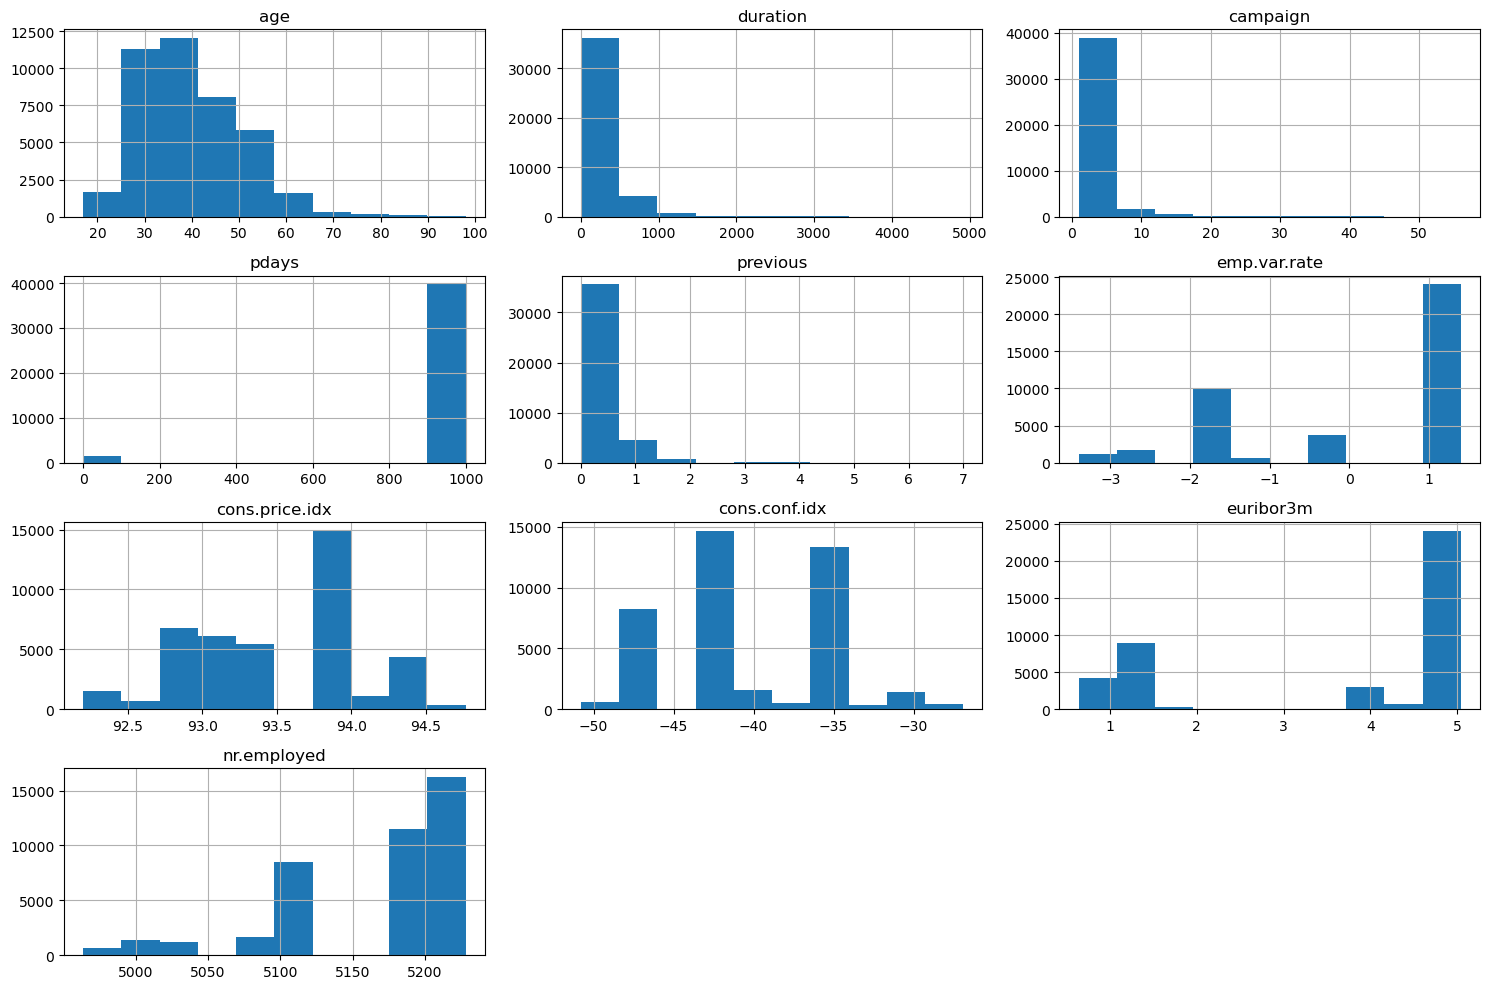

In [85]:
#Histogram for Numeric Columns
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

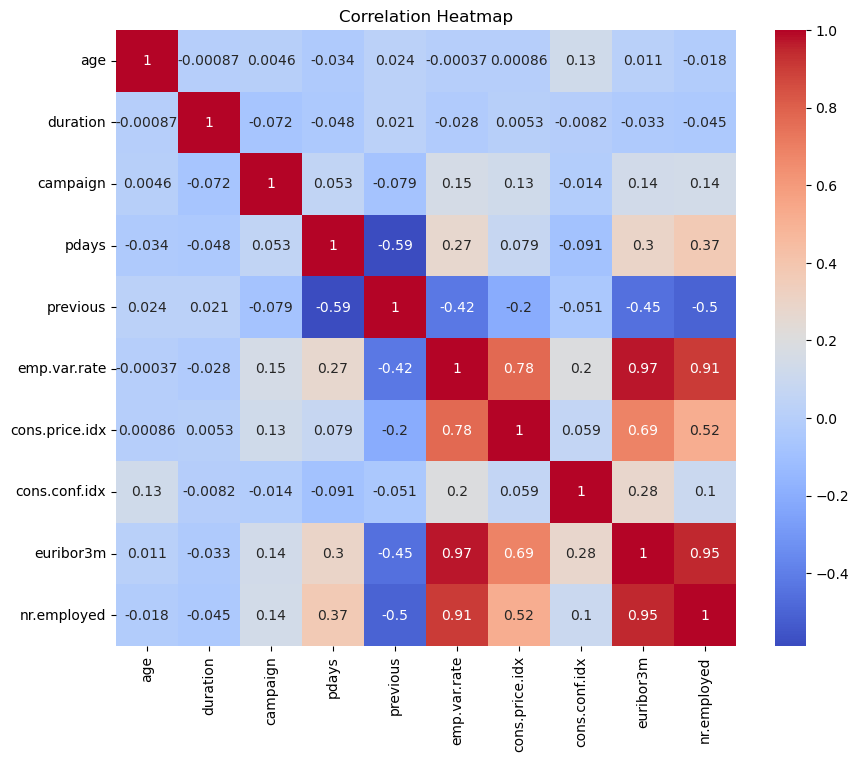

In [87]:
#Correlation Heatmap for Numeric Columns
# Select only numeric columns
import seaborn as sns
numeric_columns = df.select_dtypes(include=[ 'int64','float64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

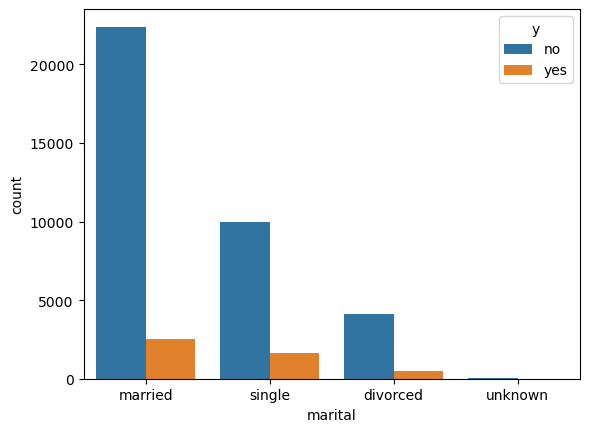

In [89]:
sns.countplot(x='marital',data=df,hue='y')
plt.show()

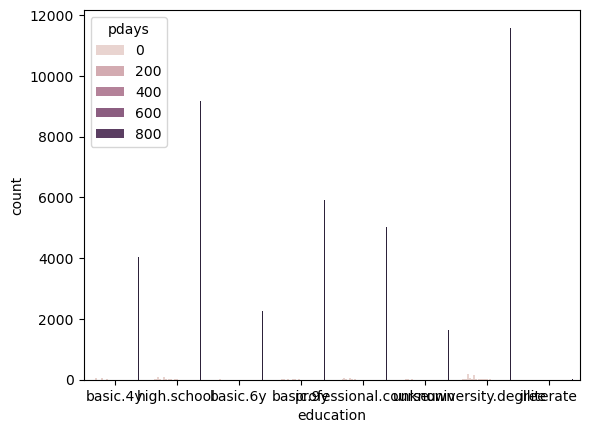

In [99]:
sns.countplot(x='education',data=df,hue='pdays')
plt.show()

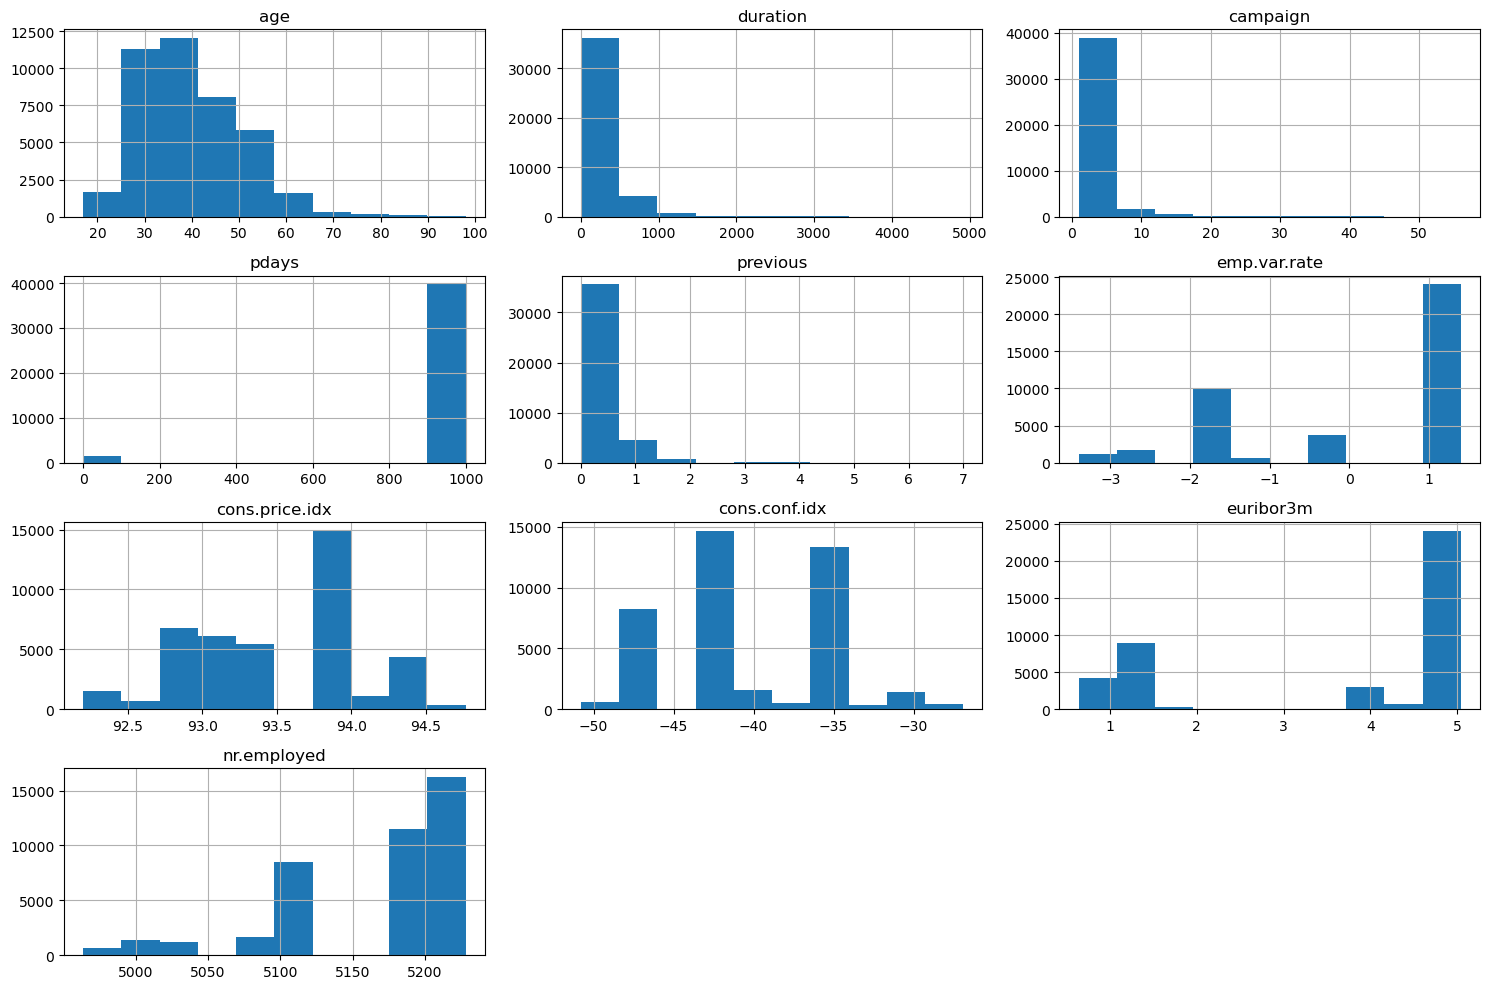

In [101]:
#scatterplot for Numeric Columns
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

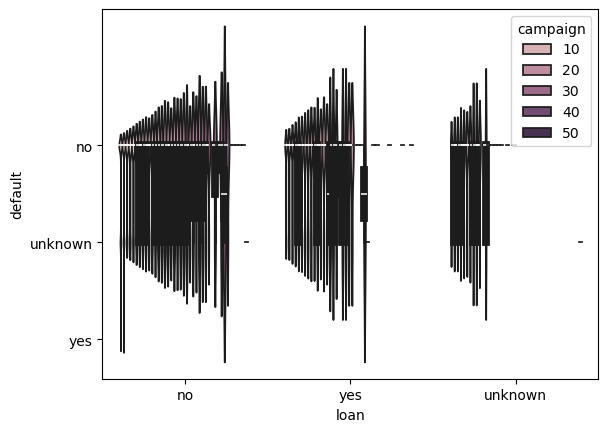

In [105]:
sns.violinplot(x='loan',y='default',data=df,hue='campaign')
plt.show()

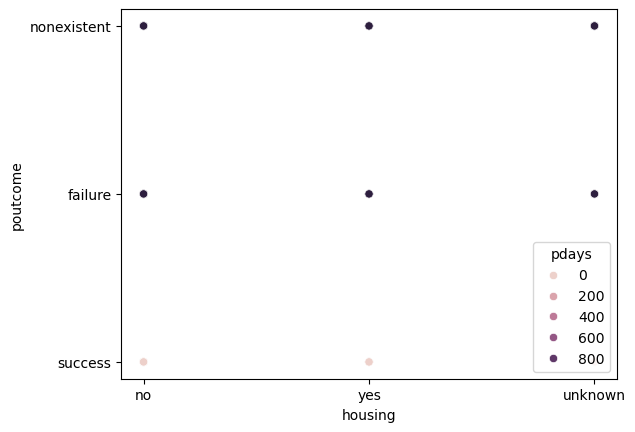

In [107]:
sns.scatterplot(x='housing',y='poutcome',data=df,hue='pdays')
plt.show()

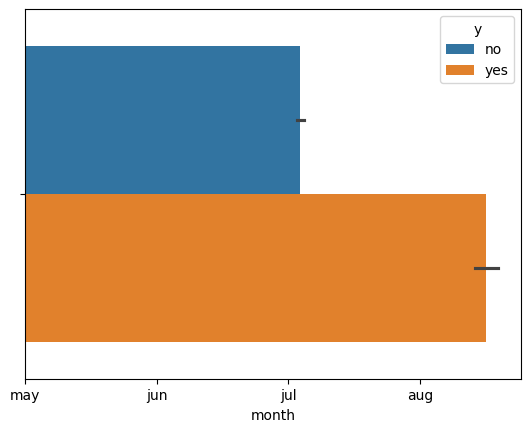

In [109]:
sns.barplot(x='month',data=df,hue='y')
plt.show()

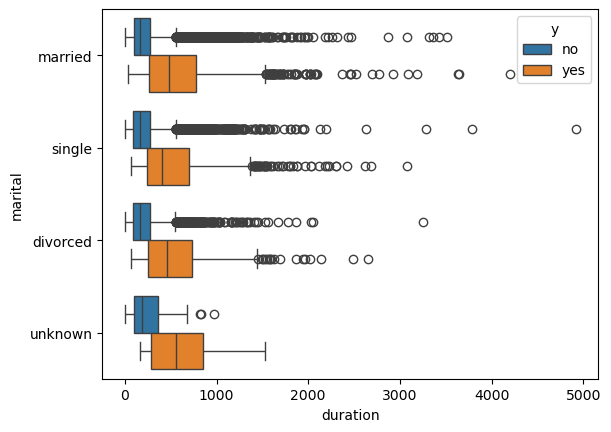

In [111]:
sns.boxplot(x='duration',y='marital',data=df,hue='y')
plt.show()

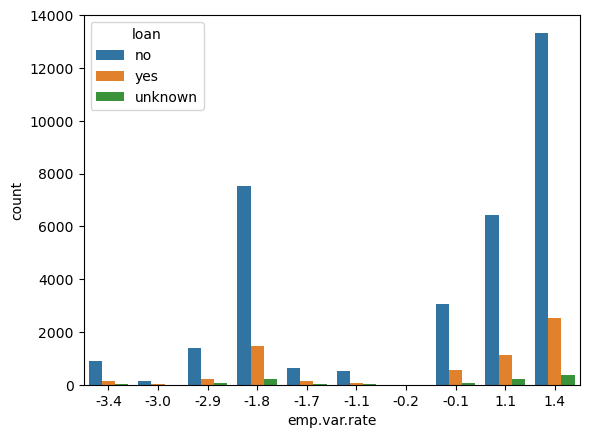

In [113]:
sns.countplot(x='emp.var.rate',data=df,hue='loan')
plt.show()

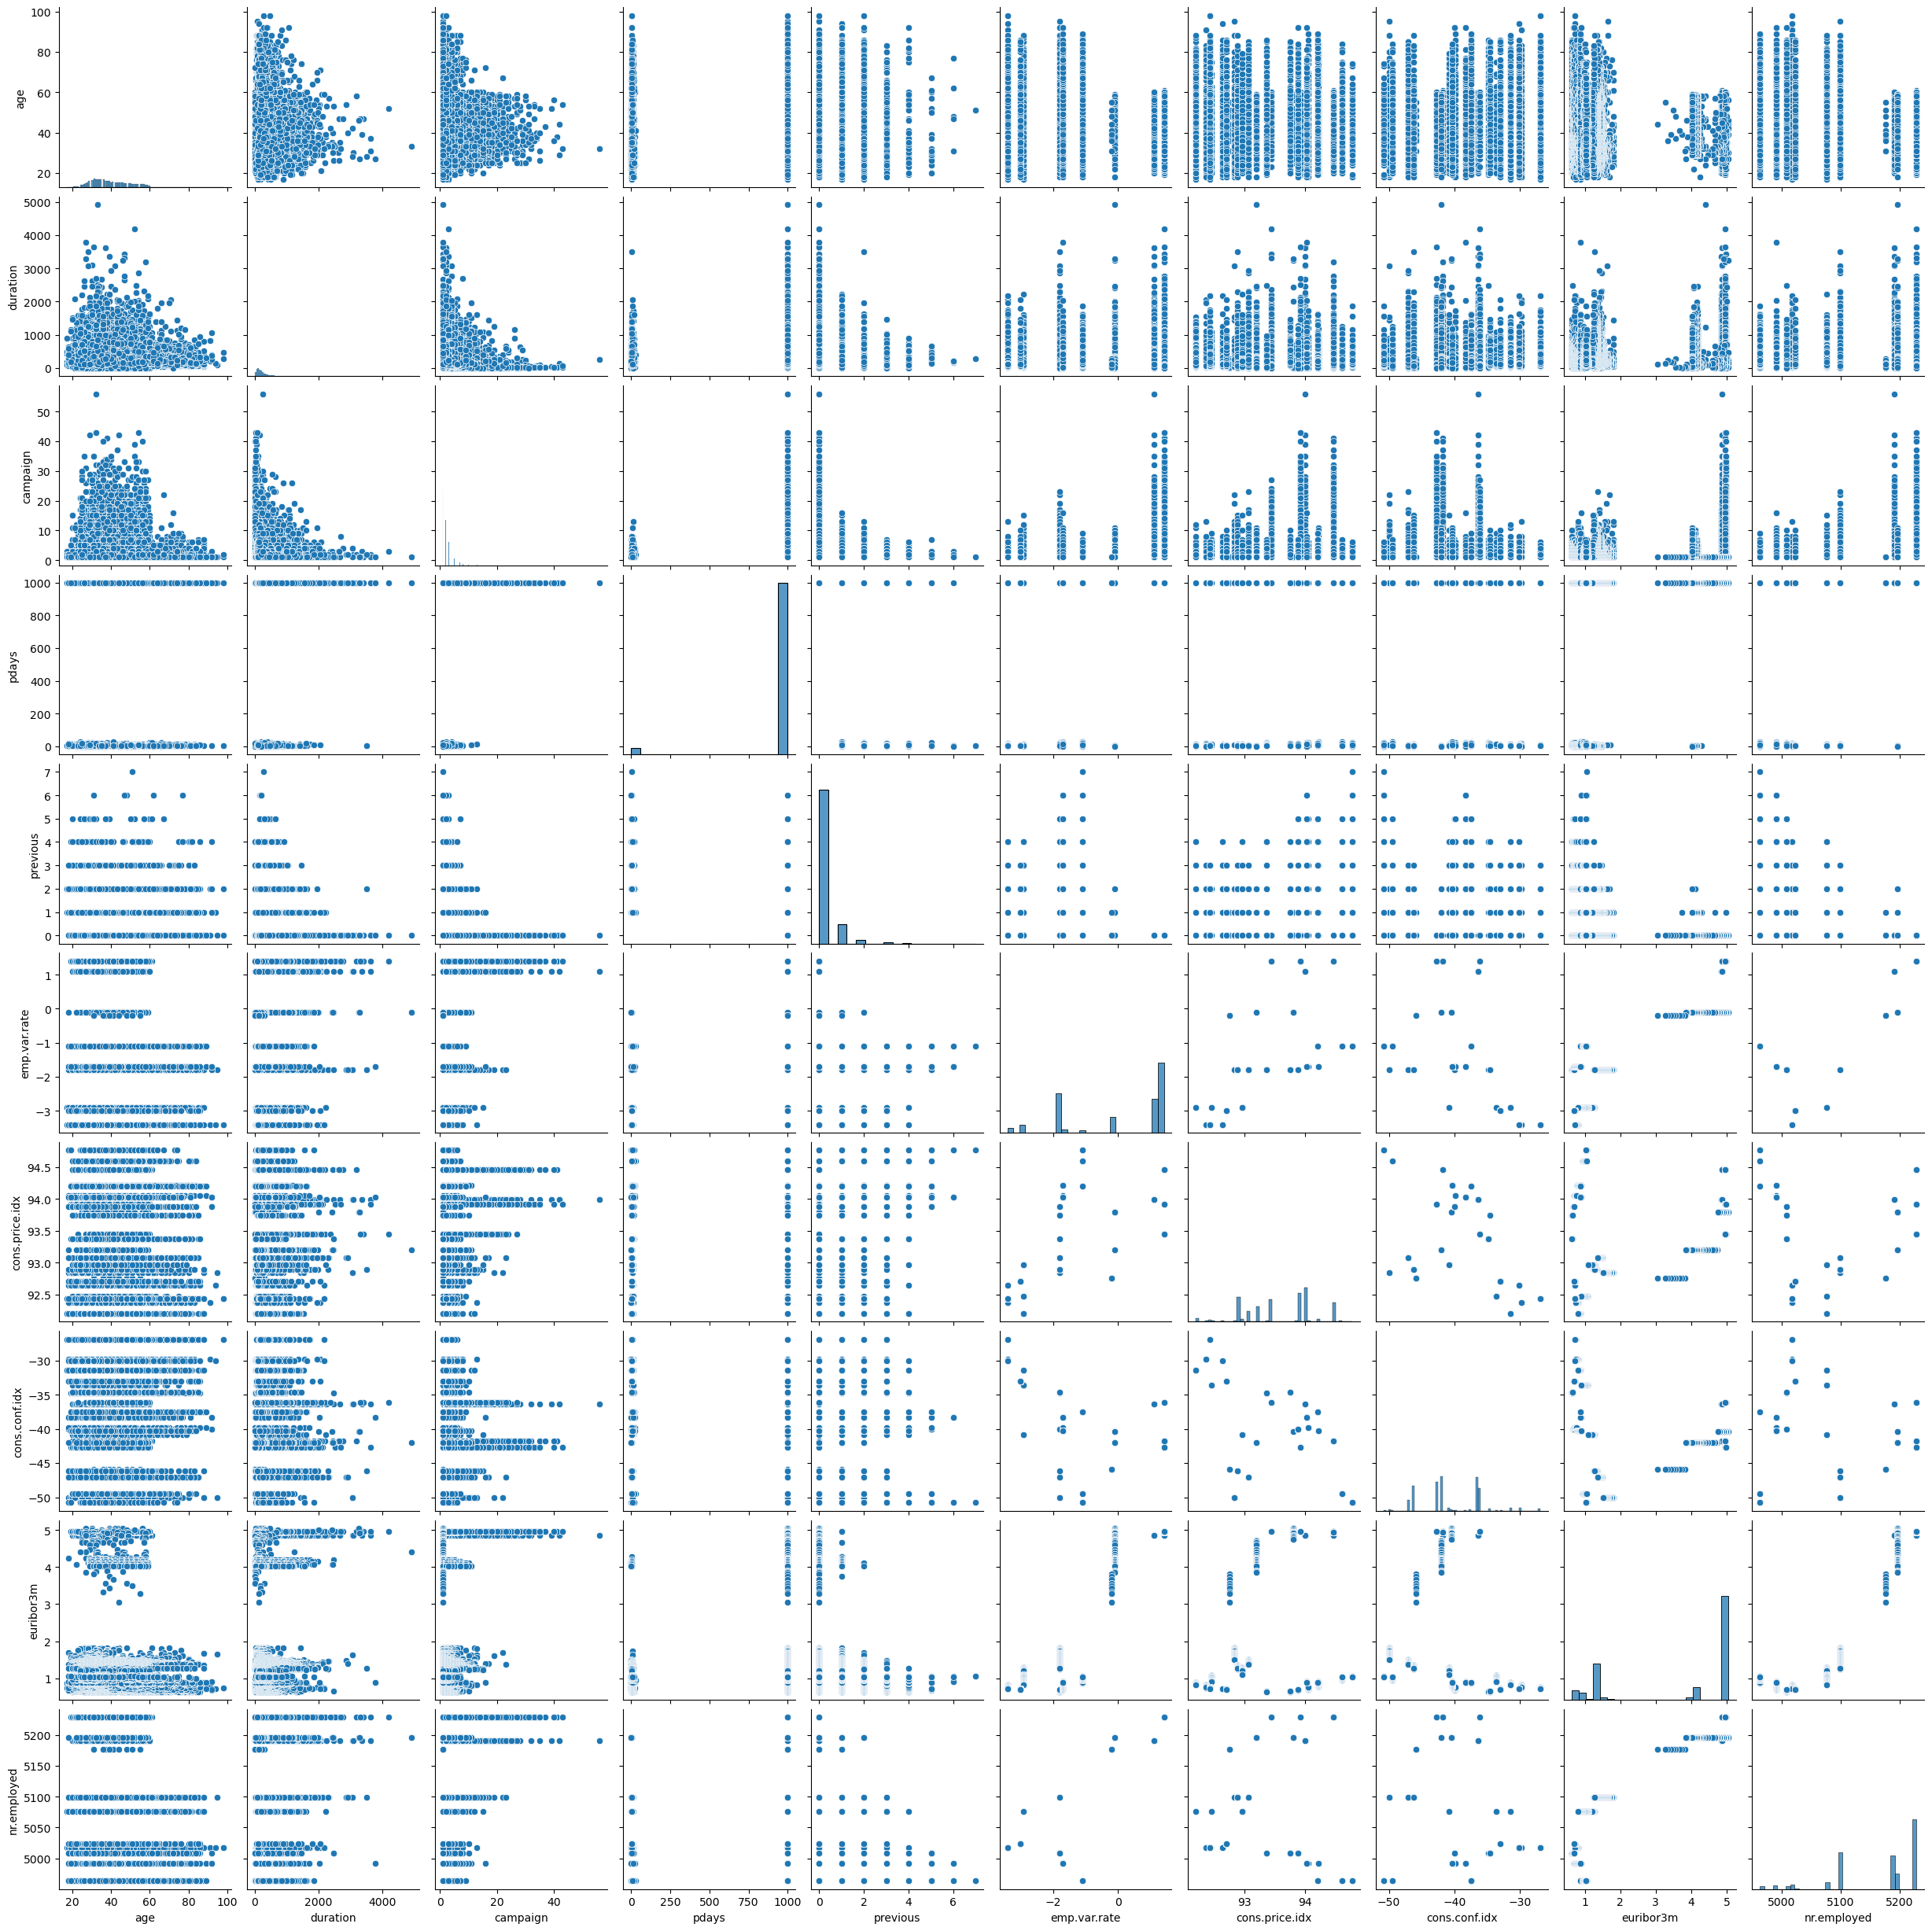

In [119]:
sns.pairplot(df)
plt.show()

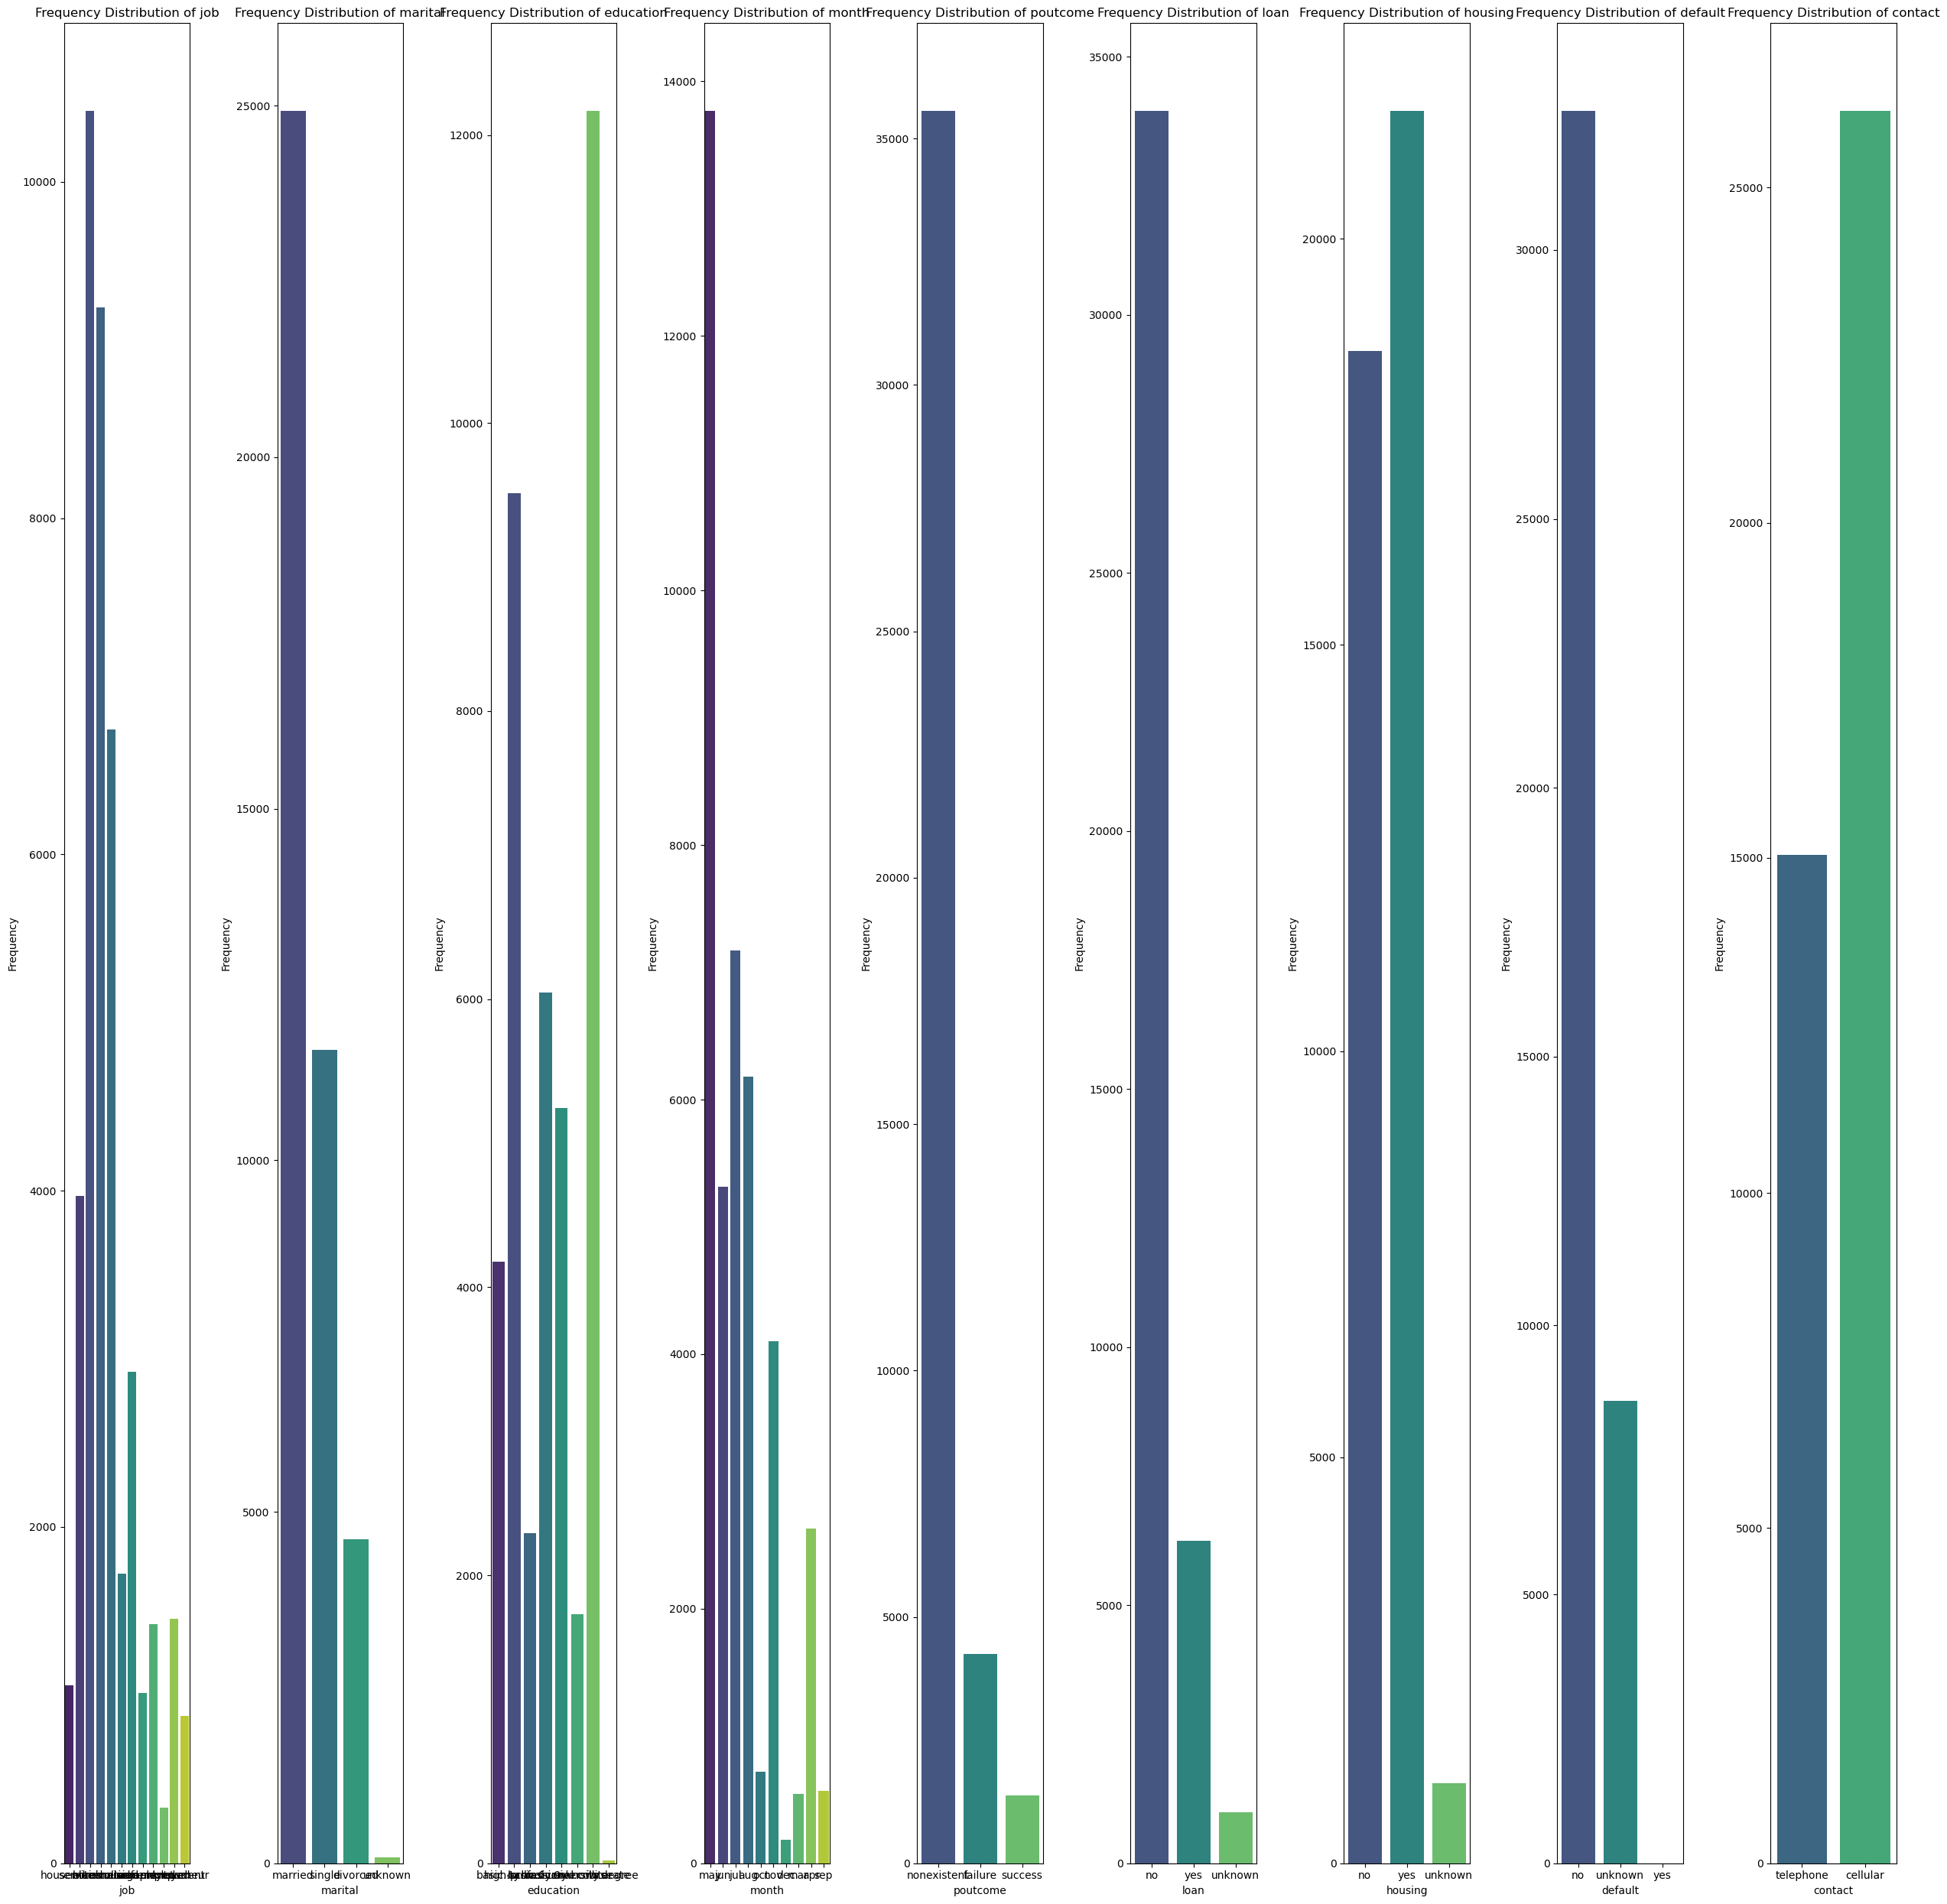

In [121]:
import warnings
warnings.filterwarnings('ignore')


# bar plots for the categorical variables
# Define the categorical variables
categorical_vars = ['job', 'marital', 'education', 'month', 'poutcome', 'loan', 'housing', 'default','contact']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(25, 25))

# Plot bar plots for each categorical variable
for ax, var in zip(axes, categorical_vars):
    sns.countplot(data=df, x=var, ax=ax, palette='viridis')
    ax.set_title(f'Frequency Distribution of {var}')
    ax.set_xlabel(f'{var}')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [123]:
col=('age','marital','education','loan','housing','month','default','poutcome','contact','y')
col

('age',
 'marital',
 'education',
 'loan',
 'housing',
 'month',
 'default',
 'poutcome',
 'contact',
 'y')

In [125]:
for column in col:
    if df[column].dtype=='object':
        df[column].fillna(df[column].mode(),inplace=True)
    else:
        df[column].fillna(df[column].median(),inplace=True)
    df

In [127]:
col2=df.select_dtypes(include=['object']).columns
col2

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Using LabelEncoder

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col2:
    df[i]=le.fit_transform(df[i])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


Using MinMaxScaler

In [132]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
scaled_values=ms.fit_transform(df.iloc[:,:-1])
X=pd.DataFrame(scaled_values,columns=df.columns[:-1])
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.053070,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.030297,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.045954,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.030704,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.062424,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.067914,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.077877,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.038430,0.018182,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.089874,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000


Splitting the data into Training and Testing sets

In [138]:
X=df.iloc[:,1:]
y=df.iloc[:,-1]

In [140]:
X

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [142]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [146]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int32

In [148]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int32

1.Using Logistic Regression

In [150]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [153]:
y_predict=lr.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0])

In [155]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 0.07441126487011411
Test set MAE: 0.07441126487011411
Test set R^2: 0.2604469191109654


In [157]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9255887351298859

2.Using Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [161]:
y_predict=lr.predict(X_test)
y_predict

array([6.67490218e-16, 3.99183076e-16, 8.10771595e-17, ...,
       3.47202788e-16, 1.00000000e+00, 2.86169242e-16])

In [163]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 2.218466497465971e-31
Test set MAE: 3.6469196362564614e-16
Test set R^2: 1.0


3.Using DecisionTree Classifier

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
model = DecisionTreeClassifier(random_state=42,criterion='gini',splitter='best',max_depth=4)#object creation
model.fit(X_train, y_train)#training
y_predict=model.predict(X_test)#testing
# Predicting and evaluating
accuracy=accuracy_score(y_test,y_predict)
accuracy

1.0

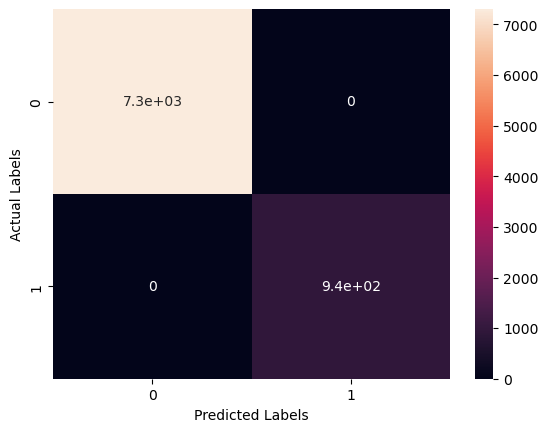

In [171]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Display the plot
plt.show()

In [173]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


4.SMOTE:

In [176]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
# from sklearn.metrics import classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training the Decision Tree model with balanced class weights
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)
# Predicting and evaluating
acc=accuracy_score(y_test,y_predict)
acc

1.0

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



In [180]:
model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='gini',random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_predict = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
accuracy

1.0

5.Using Hyperparameter tuning with GridSearchCV


In [183]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10))#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=5, cv=5)
tree_cv.fit(X_train,y_train)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params}")   # printing  best parameters

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [185]:
#best_params={'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 7, 'splitter': 'random'}
dt1=DecisionTreeClassifier(**best_params)
dt1.fit(X_train,y_train)
y_pred=dt1.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

6.Using RandomForest Classifier

In [188]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [190]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



7.Use Hyperparameter tuning with GridSearchCV


In [193]:
n_estimators = [100,150,200,250,300]  
max_features = ['auto', 'sqrt','log2']
max_depth = [10,20,30]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]

#dictionary for hyperparameters
random_grid = {'n_estimators': [100,150,200,250,300] , 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='accuracy',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)
rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best paramters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100})


In [195]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [197]:
y_predict=rf_clf2.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

1.0

In [199]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



8.Using GradientBoosting Classifier:


In [201]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=42)
gbm.fit(X_train,y_train)
y_predict=gbm.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

1.0

In [204]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


9.Using XGboost:


In [209]:
from xgboost import XGBClassifier
Xgb=XGBClassifier(random_state=42)
Xgb.fit(X_train,y_train)
y_predict=Xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

1.0

Conclusion of Accuracy_score:

In [ ]:
1.Logisitic Regression:0.92
2.DecisionTree Classifier:1.0
3.SMOTE:1.0
4.SMOTE(Hyperparameter tuning) :1.0
5.Using Hyperparameter with GridSearchCV:1.0
6.Using RandomForest Classifier:1.0
7.Using Hyperparameter with GridSearchCV:1.0
8.Using GradientBoosting Classifier:1.0
9.Using XGboost:1.0

In [230]:
print("Data analysis and predictive modeling complete. Processed dataset saved as bank_cleaned.csv")

Data analysis and predictive modeling complete. Processed dataset saved as bank_cleaned.csv


PRCP-1000-ProtugeseBank